In [38]:
!kaggle datasets download -d mohamedmaher5/vehicle-classification

Dataset URL: https://www.kaggle.com/datasets/mohamedmaher5/vehicle-classification
License(s): CC0-1.0
vehicle-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [39]:
# unzip 명령어가 안 먹힘
# !unzip -qq vehicle-classification.zip -d ./

import zipfile
import os

currentDir = os.getcwd()

zipFilePath = os.path.join(currentDir, 'vehicle-classification.zip')
extractPath = currentDir

with zipfile.ZipFile(zipFilePath, 'r') as zip_ref:
    zip_ref.extractall(extractPath)

print(f'압축 해제 완료 : {zipFilePath} -> {extractPath}')

압축 해제 완료 : c:\Users\yjkim\pytorch_study\sesac\vehicle-classification.zip -> c:\Users\yjkim\pytorch_study\sesac


In [40]:
import os

os.getcwd()

'c:\\Users\\yjkim\\pytorch_study\\sesac'

In [41]:
import os

dataPath = os.path.join(os.getcwd(), 'Vehicles')
dataFolder = os.listdir(dataPath)
print(dataFolder)
print(len(dataFolder))

['Auto Rickshaws', 'Bikes', 'Cars', 'Motorcycles', 'Planes', 'Ships', 'Trains']
7


In [42]:
# 이미지들 copy하는 폴더 삭제하는 명령어, 아래 셀은 다시 만드는 명령어
import shutil

shutil.rmtree(os.path.join(os.getcwd(), 'Vehicles_tvt'))

In [43]:
Vehicles_tvt = 'Vehicles_tvt'
v_train = os.path.join(Vehicles_tvt, 'train')
v_valid = os.path.join(Vehicles_tvt, 'valid')
v_test = os.path.join(Vehicles_tvt, 'test')

os.makedirs(v_train, exist_ok=True)
os.makedirs(v_valid, exist_ok=True)
os.makedirs(v_test, exist_ok=True)

for folder in dataFolder:
    train_temp = os.path.join(v_train, folder)
    os.makedirs(train_temp, exist_ok=True)
    valid_temp = os.path.join(v_valid, folder)
    os.makedirs(valid_temp, exist_ok=True)
    test_temp = os.path.join(v_test, folder)
    os.makedirs(test_temp, exist_ok=True)

In [44]:
for folder in dataFolder:
    class_len = os.listdir(os.path.join(dataPath, folder))
    temp = len(class_len)
    print(temp)

800
800
790
800
800
800
800


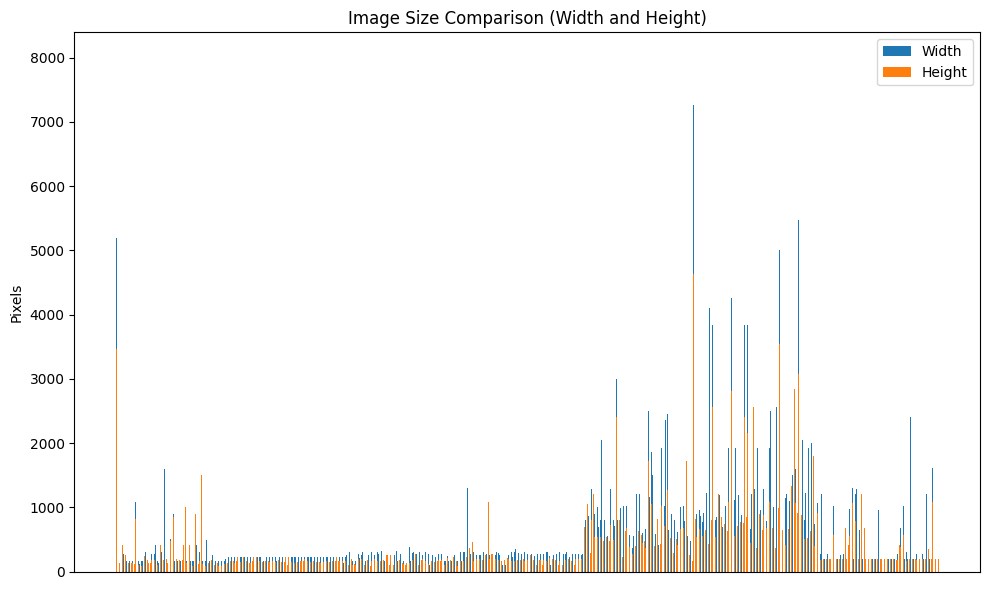

In [45]:
# 이미지 사이즈들 시각화하기

import matplotlib.pyplot as plt
from PIL import Image
import os

# 이미지 파일들이 있는 디렉터리 경로
image_folder = os.path.join(os.getcwd(), 'Vehicles')

# 이미지 파일들의 크기 확인
image_data = {}

dataFolder

for classFolder in dataFolder:
    each_classFolder = os.path.join(image_folder, classFolder)
    for filename in os.listdir(each_classFolder):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            image_path = os.path.join(each_classFolder, filename)
            with Image.open(image_path) as img:
                width, height = img.size
                image_data[filename] = (width, height)

# 데이터 분리
images = list(image_data.keys())
widths = [size[0] for size in image_data.values()]
heights = [size[1] for size in image_data.values()]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 가로 크기 막대
ax.bar(images, widths, width=0.4, label='Width', align='center')

# 세로 크기 막대
ax.bar(images, heights, width=0.4, label='Height', align='edge')

# 제목 및 축 라벨 설정
ax.set_title('Image Size Comparison (Width and Height)')
ax.set_ylabel('Pixels')

# x축 label 없애기
ax.set_xticks([])

# 범례 추가
ax.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


In [46]:
# 결론: 이미지들의 사이즈는 동일하지 않다.

In [47]:
import random, shutil

random.seed(0)

train_ratio = 0.8
valid_ratio = 0.15

dataPath_train = os.path.join(os.getcwd(), 'Vehicles_tvt\\train')
dataPath_valid = os.path.join(os.getcwd(), 'Vehicles_tvt\\valid')
dataPath_test = os.path.join(os.getcwd(), 'Vehicles_tvt\\test')
# print(dataPath_train)
# print(dataPath_valid)
# print(dataPath_test)
dataPath_check = os.path.join(dataPath_test, dataFolder[0])

if len(os.listdir(dataPath_check)) == 0:
    for folder in dataFolder:
        classFolder = os.path.join(dataPath, folder)
        fileList = os.listdir(classFolder)

        dataSize = len(fileList)
        
        trainCount = int(dataSize * train_ratio)
        validCount = int(dataSize * valid_ratio)
        testCount = dataSize - trainCount - validCount
        # print(dataSize)
        indices = list(range(dataSize))
        # print(indices)

        trainList = random.sample(indices, trainCount)
        remaining_indices = list(set(indices) - set(trainList))
        # print(remaining_indices)

        validList = random.sample(remaining_indices, validCount)

        testList = list(set(remaining_indices) - set(validList))

        trainData = [fileList[i] for i in trainList]
        validData = [fileList[i] for i in validList]
        testData = [fileList[i] for i in testList]

        for data in trainData:
            oldPath = os.path.join(classFolder, data)
            newPath = os.path.join(dataPath_train, folder)
            # print(oldPath, newPath)
            # break
            shutil.copy(oldPath, newPath)
        for data in validData:
            oldPath = os.path.join(classFolder, data)
            newPath = os.path.join(dataPath_valid, folder)
            # print(oldPath, newPath)
            # break
            shutil.copy(oldPath, newPath)
        for data in testData:
            oldPath = os.path.join(classFolder, data)
            newPath = os.path.join(dataPath_test, folder)
            # print(oldPath, newPath)
            # break
            shutil.copy(oldPath, newPath)
else:
    print('폴더가 비어 있지 않습니다.')

In [48]:
for folder in dataFolder:
    print(folder, len(os.listdir(os.path.join(dataPath_train, folder))))
print('----------')
for folder in dataFolder:
    print(folder, len(os.listdir(os.path.join(dataPath_valid, folder))))
print('----------')
for folder in dataFolder:
    print(folder, len(os.listdir(os.path.join(dataPath_test, folder))))

Auto Rickshaws 640
Bikes 640
Cars 632
Motorcycles 640
Planes 640
Ships 640
Trains 640
----------
Auto Rickshaws 120
Bikes 120
Cars 118
Motorcycles 120
Planes 120
Ships 120
Trains 120
----------
Auto Rickshaws 40
Bikes 40
Cars 40
Motorcycles 40
Planes 40
Ships 40
Trains 40


In [49]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.models import resnet50

data_dir = os.path.join(os.getcwd(), 'Vehicles_tvt')
print(data_dir)

c:\Users\yjkim\pytorch_study\sesac\Vehicles_tvt


In [50]:
from torchvision import transforms

# 2는 나중에 실험해보기(연산량 늘 것 같음)
org_size1 = (224, 224)
org_size2 = (256, 256)

visual_transform = transforms.Compose([
    transforms.Resize(org_size1),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

train_transform = transforms.Compose([
    transforms.Resize(org_size1),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = transforms.Compose([
    transforms.Resize(org_size1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [51]:
from torchvision.datasets import ImageFolder

class ImageFolderWithFilenames(ImageFolder):
    def __getitem__(self, index):
        original_tuple = super(ImageFolderWithFilenames, self).__getitem__(index)

        path, _ = self.samples[index]

        return original_tuple + (path, )

In [52]:
# test 데이터가 클래스 폴더들이 없다면 다음 코드 적용할 수 있음

# from torch.utils.data import Dataset
# from PIL import Image
# import os

# class TestDatasetWithClassNames(Dataset):
#     def __init__(self, root, transform=None, seed=42):
#         self.root = root
#         self.transform = transform
#         self.imgs = [img for img in os.listdir(root) if img.endswith('.jpg') or img.endswith('.png')]
        
#         random.seed(seed)
#         random.shuffle(self.imgs)

#         self.classNames = [self.extract_class_name(img).replace('_', ' ') for img in self.imgs]
#         self.class_to_idx = {cls: idx for idx, cls in enumerate(sorted(set(self.classNames)))}
#         self.length = len(self.imgs)

#     def extract_class_name(self, filename):
#         return '_'.join(filename.split(' ')[:-1])
    
#     def __getitem__(self, index):
#         imgName = os.path.join(self.root, self.imgs[index])
#         image = Image.open(imgName).convert('RGB')
#         imgPath = os.path.join(self.root, imgName)

#         if self.transform:
#             image = self.transform(image)

#         className = self.classNames[index]
#         classIdx = self.class_to_idx[className]

#         return image, classIdx, imgPath

#     def __len__(self):
#         return self.length

In [53]:
visual_data = ImageFolder(root=os.path.join(data_dir, 'train'), transform=visual_transform)

train_data = ImageFolder(root=os.path.join(data_dir, 'train'), transform=train_transform)
valid_data = ImageFolder(root=os.path.join(data_dir, 'valid'), transform=test_transform)
test_data = ImageFolderWithFilenames(root=os.path.join(data_dir, 'test'), transform=test_transform)

visual_loader = DataLoader(visual_data, batch_size=32, shuffle=True)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

In [54]:
print(train_data.classes)

# 클래스와 인덱스의 매핑 출력
print(train_data.class_to_idx)

['Auto Rickshaws', 'Bikes', 'Cars', 'Motorcycles', 'Planes', 'Ships', 'Trains']
{'Auto Rickshaws': 0, 'Bikes': 1, 'Cars': 2, 'Motorcycles': 3, 'Planes': 4, 'Ships': 5, 'Trains': 6}


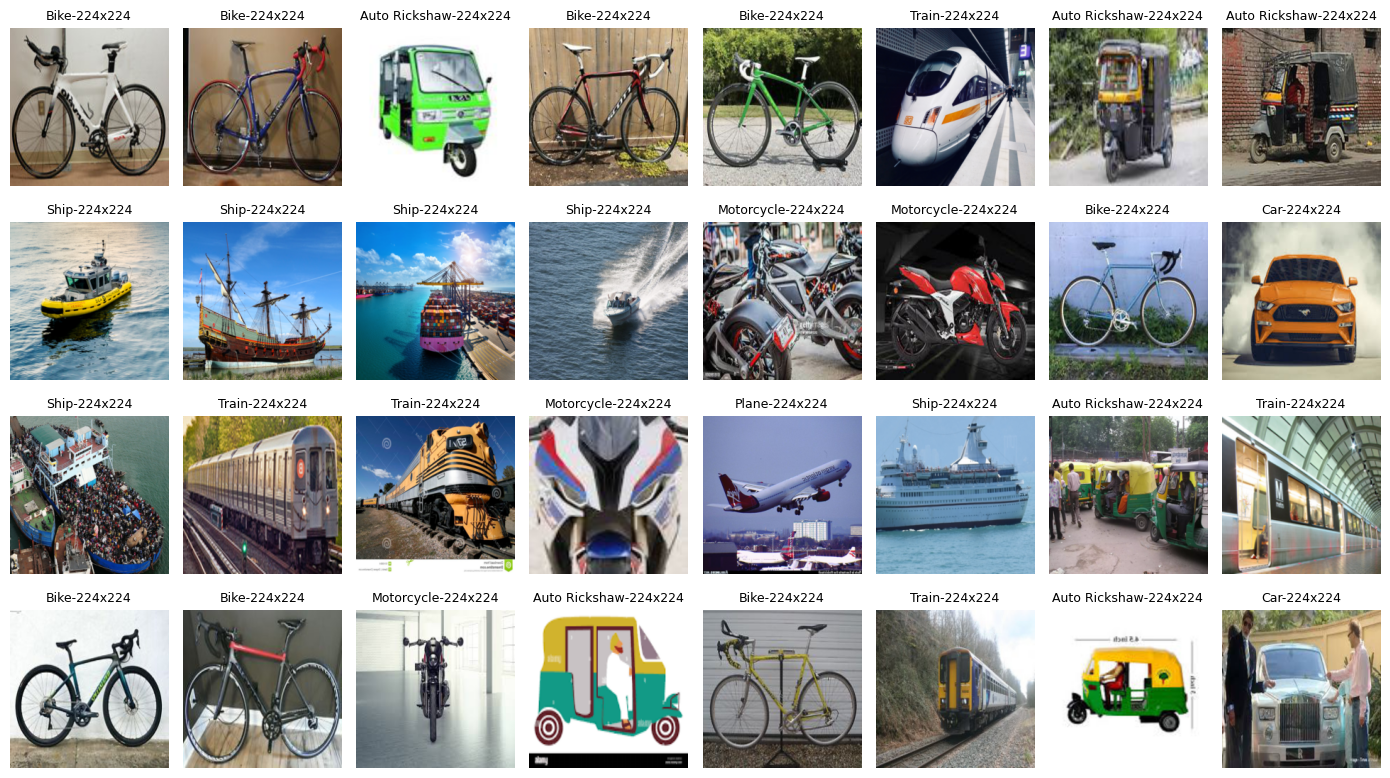

In [55]:
import matplotlib.pyplot as plt

images, labels = next(iter(visual_loader))

classes = {'Auto Rickshaw': 0, 'Bike': 1, 'Car': 2, 'Motorcycle': 3, 'Plane': 4, 'Ship': 5, 'Train': 6}
classes_reversed = {value: key for key, value in classes.items()}

fig = plt.figure(figsize=(14, 8))
for i in range(32):
    ax = fig.add_subplot(4, 8, i + 1)

    # Get image shape (height, width, channels)
    image_shape = images[i].shape

    image_class = classes_reversed[labels[i].item()]

    ax.set_title(f'{image_class}-{image_shape[1]}x{image_shape[2]}', fontsize=9)
    ax.axis('off')
    ax.imshow(images[i].permute(1, 2, 0))

plt.tight_layout()
plt.show()

In [56]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [57]:
model = resnet50(pretrained=True).to(device)

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [58]:
# %pip install pytorch-ignite

In [59]:
# modelPath = os.path.join(os.getcwd(), 'vehicle_model_resnet50')
modelPath_freeze = os.path.join(os.getcwd(), 'vehicle_model_resnet50_freeze')

if not os.path.exists(modelPath_freeze):
    os.makedirs(modelPath_freeze)

In [60]:
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path=None):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = float('inf')
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model ...')
            torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

modelPath_freeze = os.path.join(modelPath_freeze, 'resnet50_best_freeze.pth')

early_stopping = EarlyStopping(patience=7, verbose=True, path = modelPath_freeze)

In [61]:
model = resnet50(pretrained=True).to(device)

for param in model.parameters():
    param.requires_grad = False

num_features = model.fc.in_features

num_classes = 7

# 배치 정규화보다 드롭아웃을 먼저 하는 걸로 순서를 바꿔보기

# model.fc = torch.nn.Sequential(
#     torch.nn.Linear(num_features, 256),
#     torch.nn.ReLU(),
#     torch.nn.BatchNorm1d(256),
#     torch.nn.Dropout(0.5),
#     torch.nn.Linear(256, num_classes)
# ).to(device)

model.fc = torch.nn.Sequential(
    torch.nn.Linear(num_features, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.BatchNorm1d(256),
    torch.nn.Linear(256, num_classes)
).to(device)

for param in model.fc.parameters():
    param.requires_grad = True

model = model.to(device)

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [62]:
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

def fit(model, criterion, optimizer, epochs, train_loader, valid_loader, resume=False):

    if resume == False:
        train_losses = []
        train_accuracies = []
        valid_losses = []
        valid_accuracies = []
    
    for epoch in range(epochs):
        start = time.time()

        model.train()

        train_loss = 0
        train_acc = 0
        train_correct = 0

        for train_x, train_y in tqdm(train_loader):
            train_x, train_y = train_x.to(device), train_y.to(device)
            outputs = model(train_x)

            loss = criterion(outputs, train_y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_correct += (predicted == train_y).sum().item()

        valid_loss = 0
        valid_acc = 0
        valid_correct = 0

        for valid_x, valid_y in valid_loader:
            with torch.no_grad():
                model.eval()
                valid_x, valid_y = valid_x.to(device), valid_y.to(device)
                outputs = model(valid_x)

                loss = criterion(outputs, valid_y)

                valid_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                valid_correct += (predicted == valid_y).sum().item()

        train_acc = train_correct / len(train_loader.dataset)
        valid_acc = valid_correct / len(valid_loader.dataset)

        print(f'{time.time() - start:.3f}sec : [Epoch {epoch+1}/{epochs}] -> train loss : {train_loss/len(train_loader):.4f}, train_acc : {train_acc*100:.3f}% / valid loss : {valid_loss / len(valid_loader):.4f}, valid_acc : {valid_acc*100:.3f}%')

        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(train_acc)
        valid_losses.append(valid_loss / len(valid_loader))
        valid_accuracies.append(valid_acc)

        scheduler.step(valid_loss)

        now_lr = optimizer.param_groups[0]['lr']
        print(f'learning_rate {epoch+1} : {now_lr:.8f}')

        early_stopping(valid_loss, model)

        if early_stopping.early_stop:
            print('Early stopping triggered.')
            break
        print('-' * 100)

    plt.plot(train_losses, label='loss')
    plt.plot(train_accuracies, label='accuracy')
    plt.legend()
    plt.title('train loss and accuracy')
    plt.show()

    plt.plot(valid_losses, label='loss')
    plt.plot(valid_accuracies, label='accuracy')
    plt.legend()
    plt.title('valid loss and accuracy')
    plt.show()

100%|██████████| 70/70 [00:48<00:00,  1.46it/s]


56.677sec : [Epoch 1/25] -> train loss : 0.3316, train_acc : 94.365% / valid loss : 0.0928, valid_acc : 97.730%
learning_rate 1 : 0.00100000
Validation loss decreased (inf --> 4.915759). Saving model ...
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:47<00:00,  1.47it/s]


56.551sec : [Epoch 2/25] -> train loss : 0.0965, train_acc : 98.256% / valid loss : 0.0635, valid_acc : 98.088%
learning_rate 2 : 0.00100000
Validation loss decreased (4.915759 --> 3.364270). Saving model ...
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:47<00:00,  1.47it/s]


56.576sec : [Epoch 3/25] -> train loss : 0.0752, train_acc : 98.345% / valid loss : 0.0530, valid_acc : 98.447%
learning_rate 3 : 0.00100000
Validation loss decreased (3.364270 --> 2.806528). Saving model ...
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:47<00:00,  1.47it/s]


56.572sec : [Epoch 4/25] -> train loss : 0.0639, train_acc : 98.547% / valid loss : 0.0482, valid_acc : 98.566%
learning_rate 4 : 0.00100000
Validation loss decreased (2.806528 --> 2.555616). Saving model ...
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:48<00:00,  1.46it/s]


56.968sec : [Epoch 5/25] -> train loss : 0.0597, train_acc : 98.614% / valid loss : 0.0505, valid_acc : 98.088%
learning_rate 5 : 0.00100000
EarlyStopping counter: 1 out of 7
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:48<00:00,  1.45it/s]


57.007sec : [Epoch 6/25] -> train loss : 0.0550, train_acc : 98.882% / valid loss : 0.0403, valid_acc : 98.686%
learning_rate 6 : 0.00100000
Validation loss decreased (2.555616 --> 2.136203). Saving model ...
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:47<00:00,  1.46it/s]


56.891sec : [Epoch 7/25] -> train loss : 0.0467, train_acc : 98.927% / valid loss : 0.0391, valid_acc : 98.686%
learning_rate 7 : 0.00100000
Validation loss decreased (2.136203 --> 2.071805). Saving model ...
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:47<00:00,  1.47it/s]


56.305sec : [Epoch 8/25] -> train loss : 0.0461, train_acc : 98.949% / valid loss : 0.0423, valid_acc : 98.447%
learning_rate 8 : 0.00100000
EarlyStopping counter: 1 out of 7
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:47<00:00,  1.46it/s]


56.720sec : [Epoch 9/25] -> train loss : 0.0459, train_acc : 98.994% / valid loss : 0.0409, valid_acc : 98.686%
learning_rate 9 : 0.00100000
EarlyStopping counter: 2 out of 7
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:47<00:00,  1.46it/s]


56.281sec : [Epoch 10/25] -> train loss : 0.0439, train_acc : 99.061% / valid loss : 0.0381, valid_acc : 98.327%
learning_rate 10 : 0.00100000
Validation loss decreased (2.071805 --> 2.020939). Saving model ...
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:48<00:00,  1.46it/s]


56.908sec : [Epoch 11/25] -> train loss : 0.0406, train_acc : 99.128% / valid loss : 0.0315, valid_acc : 99.164%
learning_rate 11 : 0.00100000
Validation loss decreased (2.020939 --> 1.668142). Saving model ...
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:48<00:00,  1.46it/s]


56.846sec : [Epoch 12/25] -> train loss : 0.0422, train_acc : 98.927% / valid loss : 0.0349, valid_acc : 98.327%
learning_rate 12 : 0.00100000
EarlyStopping counter: 1 out of 7
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:47<00:00,  1.46it/s]


56.727sec : [Epoch 13/25] -> train loss : 0.0322, train_acc : 99.441% / valid loss : 0.0312, valid_acc : 98.686%
learning_rate 13 : 0.00100000
Validation loss decreased (1.668142 --> 1.651093). Saving model ...
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:48<00:00,  1.45it/s]


57.056sec : [Epoch 14/25] -> train loss : 0.0361, train_acc : 99.240% / valid loss : 0.0318, valid_acc : 98.805%
learning_rate 14 : 0.00100000
EarlyStopping counter: 1 out of 7
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:48<00:00,  1.45it/s]


56.848sec : [Epoch 15/25] -> train loss : 0.0323, train_acc : 99.284% / valid loss : 0.0327, valid_acc : 98.327%
learning_rate 15 : 0.00100000
EarlyStopping counter: 2 out of 7
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:48<00:00,  1.45it/s]


57.131sec : [Epoch 16/25] -> train loss : 0.0332, train_acc : 99.307% / valid loss : 0.0387, valid_acc : 98.327%
learning_rate 16 : 0.00100000
EarlyStopping counter: 3 out of 7
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:48<00:00,  1.45it/s]


57.173sec : [Epoch 17/25] -> train loss : 0.0334, train_acc : 99.352% / valid loss : 0.0402, valid_acc : 98.447%
learning_rate 17 : 0.00050000
EarlyStopping counter: 4 out of 7
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:48<00:00,  1.45it/s]


57.300sec : [Epoch 18/25] -> train loss : 0.0311, train_acc : 99.262% / valid loss : 0.0283, valid_acc : 98.805%
learning_rate 18 : 0.00050000
Validation loss decreased (1.651093 --> 1.501928). Saving model ...
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:48<00:00,  1.45it/s]


57.131sec : [Epoch 19/25] -> train loss : 0.0251, train_acc : 99.374% / valid loss : 0.0298, valid_acc : 98.805%
learning_rate 19 : 0.00050000
EarlyStopping counter: 1 out of 7
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:48<00:00,  1.45it/s]


57.146sec : [Epoch 20/25] -> train loss : 0.0244, train_acc : 99.441% / valid loss : 0.0322, valid_acc : 98.327%
learning_rate 20 : 0.00050000
EarlyStopping counter: 2 out of 7
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:48<00:00,  1.44it/s]


57.686sec : [Epoch 21/25] -> train loss : 0.0226, train_acc : 99.597% / valid loss : 0.0257, valid_acc : 98.925%
learning_rate 21 : 0.00050000
Validation loss decreased (1.501928 --> 1.362875). Saving model ...
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:48<00:00,  1.46it/s]


57.081sec : [Epoch 22/25] -> train loss : 0.0196, train_acc : 99.441% / valid loss : 0.0298, valid_acc : 99.164%
learning_rate 22 : 0.00050000
EarlyStopping counter: 1 out of 7
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:47<00:00,  1.46it/s]


57.086sec : [Epoch 23/25] -> train loss : 0.0187, train_acc : 99.687% / valid loss : 0.0246, valid_acc : 99.164%
learning_rate 23 : 0.00050000
Validation loss decreased (1.362875 --> 1.304252). Saving model ...
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:48<00:00,  1.45it/s]


57.271sec : [Epoch 24/25] -> train loss : 0.0194, train_acc : 99.575% / valid loss : 0.0256, valid_acc : 98.925%
learning_rate 24 : 0.00050000
EarlyStopping counter: 1 out of 7
----------------------------------------------------------------------------------------------------


100%|██████████| 70/70 [00:48<00:00,  1.44it/s]


57.628sec : [Epoch 25/25] -> train loss : 0.0174, train_acc : 99.575% / valid loss : 0.0287, valid_acc : 98.566%
learning_rate 25 : 0.00050000
EarlyStopping counter: 2 out of 7
----------------------------------------------------------------------------------------------------


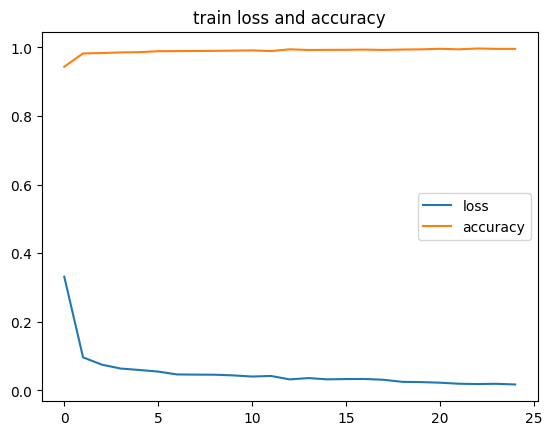

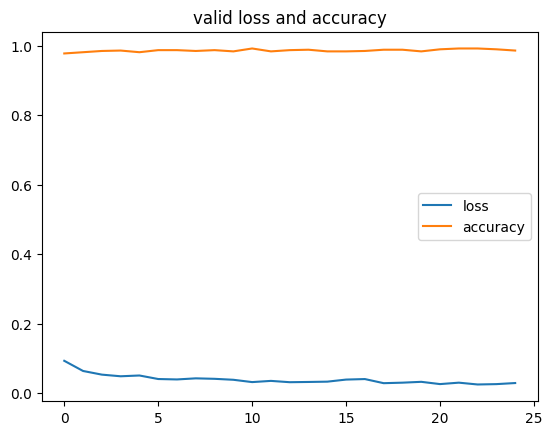

In [63]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

lr = 0.001
epochs = 25

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

fit(model, criterion, optimizer, epochs, train_loader, valid_loader, resume=False)

In [64]:
import matplotlib.pyplot as plt
from PIL import Image

def evaluate_and_visualize(model, test_loader, criterion):
    test_loss = 0
    test_correct = 0
    test_total = 0

    all_targets = []
    all_preds = []

    incorrect_labels = []
    incorrect_preds = []
    incorrect_filenames = []

    model.eval()
    with torch.no_grad():
        for test_x, test_y, filenames in tqdm(test_loader):
            test_x, test_y = test_x.to(device), test_y.to(device)
            outputs = model(test_x)

            loss = criterion(outputs, test_y)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            test_correct += (predicted == test_y).sum().item()
            test_total += test_y.size(0)

            all_targets.extend(test_y.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            if predicted != test_y:
                incorrect_labels.append(test_y.cpu().numpy())
                incorrect_preds.append(predicted.cpu().numpy())
                incorrect_filenames.append(filenames[0])

    test_accuracy = test_correct / test_total
    print(f'test_correct : {test_correct}, test_total : {test_total}')
    print(f'Test Loss : {test_loss / len(test_loader):.4f}, Test Accuracy : {test_accuracy * 100:.2f}%')

    print(f'틀린 개수: {len(incorrect_filenames)}')
    
    fig = plt.figure(figsize=(24,24))
    for i in range(min(16, len(incorrect_filenames))):
        ax = fig.add_subplot(4, 4, i + 1)
        image = Image.open(incorrect_filenames[i])
        ax.imshow(image)
        
        if incorrect_labels[i] == 0:
            true_label = 'Auto Rickshaw'
        elif incorrect_labels[i] == 1:
            true_label = 'Bike'
        elif incorrect_labels[i] == 2:
            true_label = 'Car'
        elif incorrect_labels[i] == 3:
            true_label = 'Motorcycle'
        elif incorrect_labels[i] == 4:
            true_label = 'Plane'
        elif incorrect_labels[i] == 5:
            true_label = 'Ship'
        elif incorrect_labels[i] == 6:
            true_label = 'Train'

        if incorrect_preds[i] == 0:
            pred_label = 'Auto Rickshaw'
        elif incorrect_preds[i] == 1:
            pred_label = 'Bike'
        elif incorrect_preds[i] == 2:
            pred_label = 'Car'
        elif incorrect_preds[i] == 3:
            pred_label = 'Motorcycle'
        elif incorrect_preds[i] == 4:
            pred_label = 'Plane'
        elif incorrect_preds[i] == 5:
            pred_label = 'Ship'
        elif incorrect_preds[i] == 6:
            pred_label = 'Train'
        # basename 파일 경로에서 파일 이름만 추출하는 함수
        filename = os.path.basename(incorrect_filenames[i])

        ax.set_title(f'Pred : {pred_label}, Label : {true_label}, {filename}', fontsize=14)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

    return all_preds, all_targets

In [65]:
# {'Auto Rickshaw': 0, 'Bike': 1, 'Car': 2, 'Motorcycle': 3, 'Plane': 4, 'Ship': 5, 'Train': 6}

100%|██████████| 280/280 [00:04<00:00, 59.20it/s] 


test_correct : 278, test_total : 280
Test Loss : 0.0172, Test Accuracy : 99.29%
틀린 개수: 2


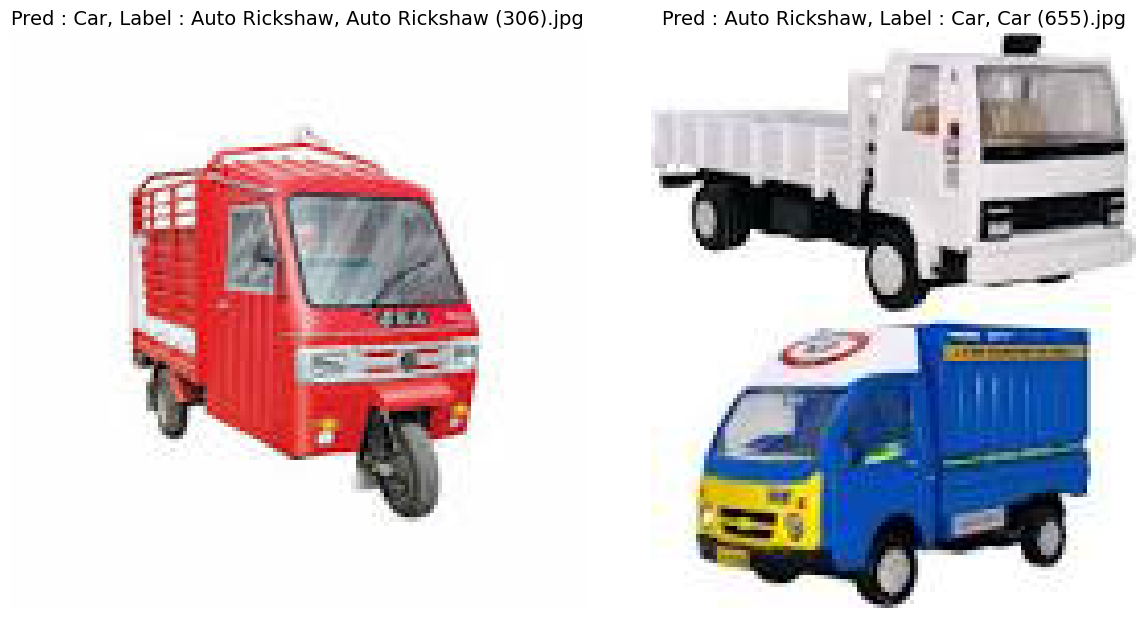

In [66]:
# ealrystopping의 patience=8로 줬을 때 test data 틀린 개수 7, epoch 30
# ealrystopping의 patience=4로 줬을 때 test data 틀린 개수 32, epoch 30
# ealrystopping의 patience=7로 줬을 때 test data 틀린 개수 5, epoch 30(25 정도로만 해도 될 것 같음)

# ealrystopping의 patience=7로 줬을 때 test data 틀린 개수 11, epoch 25(드롭아웃보다 배치정규화 먼저 하는 경우), Test Loss : 0.1196, Test Accuracy : 96.07%
# ealrystopping의 patience=7로 줬을 때 test data 틀린 개수 10, epoch 25(배치 정규화보다 드롭아웃 먼저 하는 경우), Test Loss : 0.1132, Test Accuracy : 96.43%

# ealrystopping의 patience=7로 줬을 때 test data 틀린 개수 5, epoch 25(배치 정규화보다 드롭아웃 먼저 하는 경우)+(데이터 증강 넣었을 때), Test Loss : 0.0610, Test Accuracy : 98.21%

# 앞부분 freeze 시켰을 때 test data 틀린 개수 1, Test Loss : 0.0173, Test Accuracy : 99.64%

# best model 수정 test data 틀린 개수 2, Test Loss : 0.0172, Test Accuracy : 99.29%
preds, labels = evaluate_and_visualize(model, test_loader, criterion)

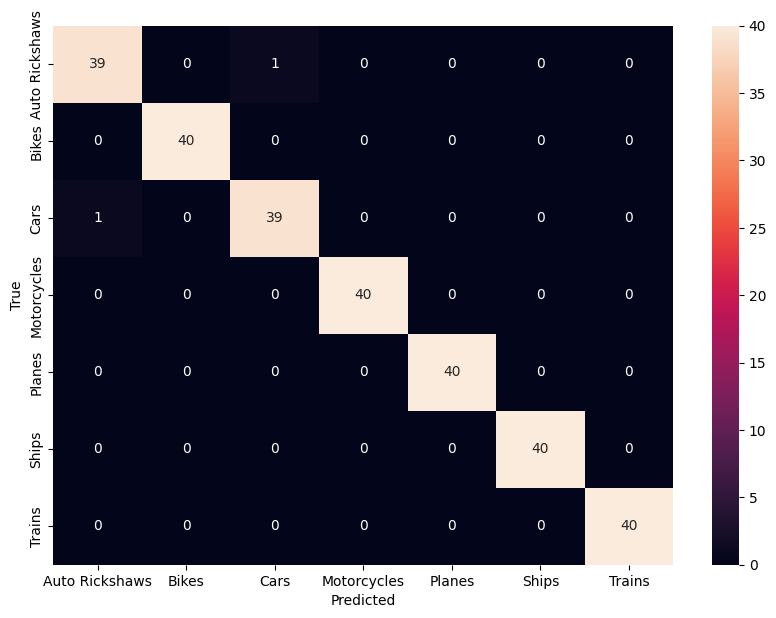

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(labels, predictions, class_names):
    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(labels, preds, train_data.classes)

In [68]:
best_model = resnet50(pretrained=False).to(device)

num_features = best_model.fc.in_features

best_model.fc = torch.nn.Sequential(
    torch.nn.Linear(num_features, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.BatchNorm1d(256),
    torch.nn.Linear(256, num_classes)
).to(device)

best_model_state_dict = torch.load('./vehicle_model_resnet50_freeze/resnet50_best_freeze.pth', map_location=device)
best_model.load_state_dict(best_model_state_dict)
print(best_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

C:\Users\yjkim\AppData\Local\Temp\ipykernel_18044\1670408347.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model_state_dict = torch.load('./vehicle_model_resnet5

100%|██████████| 280/280 [00:04<00:00, 59.22it/s] 

test_correct : 279, test_total : 280
Test Loss : 0.0211, Test Accuracy : 99.64%
틀린 개수: 1


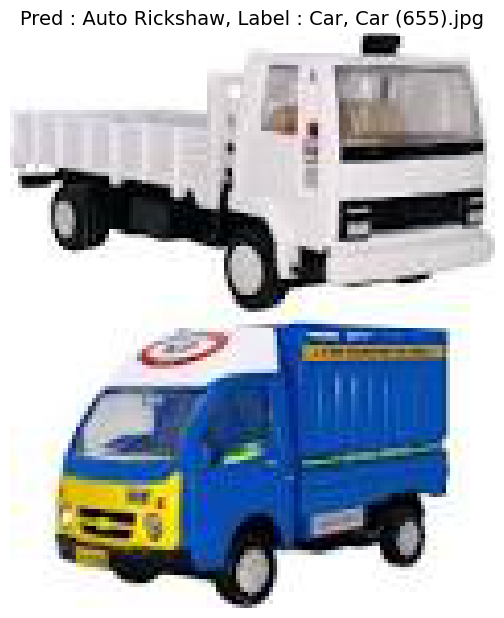

In [69]:
# ealrystopping의 patience=7로 줬을 때 test data 틀린 개수 6, epoch 25(드롭아웃보다 배치정규화 먼저 하는 경우), Test Loss : 0.0739, Test Accuracy : 97.86%
# ealrystopping의 patience=7로 줬을 때 test data 틀린 개수 1, epoch 25(배치 정규화보다 드롭아웃 먼저 하는 경우), Test Loss : 0.0241, Test Accuracy : 99.64%

# ealrystopping의 patience=7로 줬을 때 test data 틀린 개수 5, epoch 25(배치 정규화보다 드롭아웃 먼저 하는 경우)+(데이터 증강 넣었을 때), Test Loss : 0.0610, Test Accuracy : 98.21%

# 앞부분 freeze 시켰을 때 test data 틀린 개수 1, Test Loss : 0.0173, Test Accuracy : 99.64%

# best model 수정 test data 틀린 개수 1, Test Loss : 0.0211, Test Accuracy : 99.64%
preds, labels  = evaluate_and_visualize(best_model, test_loader, criterion)

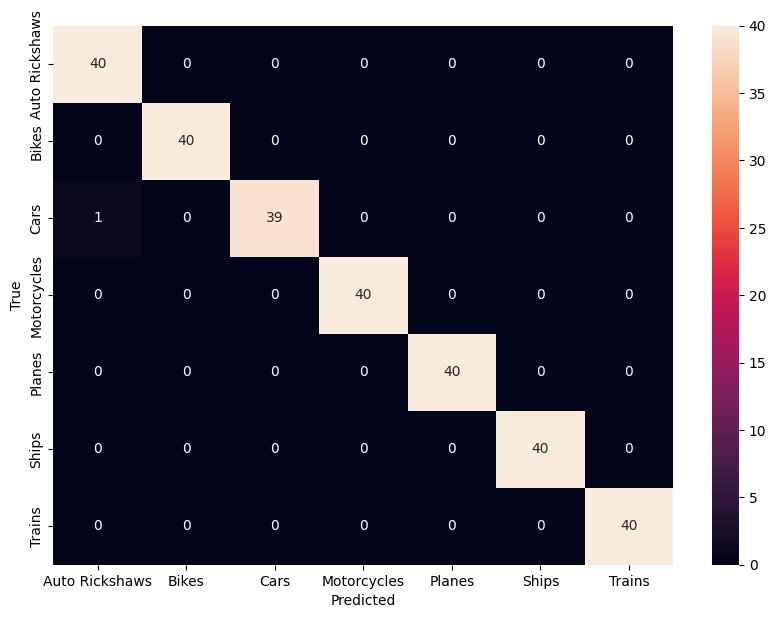

In [70]:
plot_confusion_matrix(labels, preds, train_data.classes)